# Supplementary information - DFT+U in BiFeO$_3$

This notebook makes use of the pymatgen package to display some of the characteristics of the VASP input and outputs in the study of DFT+U in bismuth ferrite.



In [138]:
from pymatgen.io.vasp import Vasprun
from pymatgen.electronic_structure.core import Spin, OrbitalType
from pymatgen import periodic_table
elementBi = periodic_table.Element("Bi")
elementFe = periodic_table.Element("Fe")
elementO  = periodic_table.Element("O")

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.gridspec import GridSpec
%matplotlib inline

# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
    
import os
from IPython.display import display, Image, HTML
from glob import glob
import re

## Rhombohedral unit cell setting

### Relaxed Geometry

#### Relaxations

Let's start with the relaxation of the geometry at each value of U:

In [2]:
relaxations = [Vasprun("rhombohedral_setting/relaxed_geometry/U_{0}/relax_vasprun_u{0}.xml".format(u)) for u in range(9)]

/Users/kshenton/Library/Python/2.7/lib/python/site-packages/pymatgen/io/vasp/outputs.py:814: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/kshenton/OneDrive - University College London/PhD/Data/BFO/BFO_dftu_SI/rhombohedral_setting/relaxed_geometry/U_0
  " was found in {}".format(os.path.abspath(p)))
/Users/kshenton/Library/Python/2.7/lib/python/site-packages/pymatgen/io/vasp/outputs.py:814: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/kshenton/OneDrive - University College London/PhD/Data/BFO/BFO_dftu_SI/rhombohedral_setting/relaxed_geometry/U_1
  " was found in {}".format(os.path.abspath(p)))
/Users/kshenton/Library/Python/2.7/lib/python/site-packages/pymatgen/io/vasp/outputs.py:814: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/kshenton/OneDrive - University College London/PhD/Data/BFO/BFO_dftu_SI/rhombohedral_setting/relaxed_geometry/U_2
  " was found in {}".format(os.path.abspath(p)))
/Users/ksh

Make sure we applied the correct U values:

In [42]:
for run in relaxations:
    print run.hubbards

{'Bi': 0.0, 'O': 0.0, 'Fe': 0.0}
{'Bi': 0.0, 'O': 0.0, 'Fe': 1.0}
{'Bi': 0.0, 'O': 0.0, 'Fe': 2.0}
{'Bi': 0.0, 'O': 0.0, 'Fe': 3.0}
{'Bi': 0.0, 'O': 0.0, 'Fe': 4.0}
{'Bi': 0.0, 'O': 0.0, 'Fe': 5.0}
{'Bi': 0.0, 'O': 0.0, 'Fe': 6.0}
{'Bi': 0.0, 'O': 0.0, 'Fe': 7.0}
{'Bi': 0.0, 'O': 0.0, 'Fe': 8.0}


Get the maximum force component in the last ionic step for each run:   

In [41]:
for run in relaxations:
    print "U={0} eV".format(run.hubbards["Fe"])
    print "      Max force component:  {0:2.4f} eV/Å".format( abs(np.array(run.ionic_steps[-1]['forces'])).max())
    print "      Max stress component: {0:2.4f} kb".format( abs(np.array(run.ionic_steps[-1]['stress'])).max())

U=0.0 eV
      Max force component:  0.0010 eV/Å
      Max stress component: 0.0266 kb
U=1.0 eV
      Max force component:  0.0012 eV/Å
      Max stress component: 0.0455 kb
U=2.0 eV
      Max force component:  0.0005 eV/Å
      Max stress component: 0.0988 kb
U=3.0 eV
      Max force component:  0.0009 eV/Å
      Max stress component: 0.0287 kb
U=4.0 eV
      Max force component:  0.0005 eV/Å
      Max stress component: 0.0858 kb
U=5.0 eV
      Max force component:  0.0005 eV/Å
      Max stress component: 0.0337 kb
U=6.0 eV
      Max force component:  0.0005 eV/Å
      Max stress component: 0.0722 kb
U=7.0 eV
      Max force component:  0.0010 eV/Å
      Max stress component: 0.0160 kb
U=8.0 eV
      Max force component:  0.0008 eV/Å
      Max stress component: 0.0346 kb


Here are the effects of U on the lattice parameters and unit cell angles:

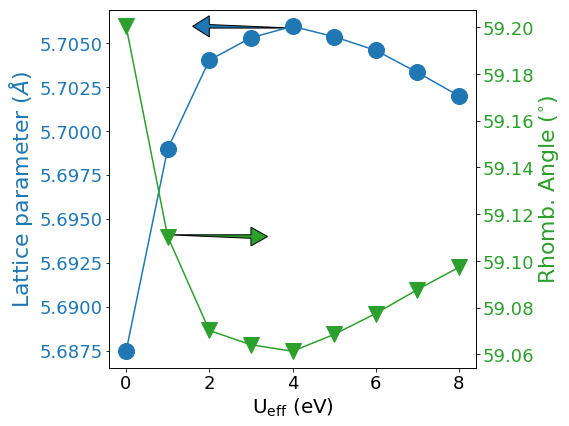

In [135]:
run.final_structure
u_vals = range(9)
todegrees = 180.0/np.pi
# a,b,c, alpha, beta, gamma: 
a_params = [run.final_structure.lattice.a for run in relaxations]
alphas = [run.final_structure.lattice.alpha for run in relaxations]

##############################################
### --- Lattice param.  ---###
fig, ax = plt.subplots( figsize=(8,6))
ax.plot(u_vals, a_params, marker='o',markersize=16,label='a', color=tableau20[0])
for tl in ax.get_yticklabels():
    tl.set_color(tableau20[0])

ax.set_xlabel(r'$\mathrm{U_{eff}}$ (eV)',fontsize=20)
# Make the y-axis label and tick labels match the line color.
ax.set_ylabel('Lattice parameter ($\AA$)', fontsize=22, color=tableau20[0])

#################################
#    --- Rhomb. angle ---     #
angleplot = ax.twinx()
angleplot.plot(u_vals, alphas, marker='v',markersize=16,label=r'$\alpha$',color=tableau20[4])
# angleplot.plot(u_vals, cell_pars[:,4], marker='v',markersize=16,label=r'$\beta$',color=tableau20[4])
# angleplot.plot(u_vals, cell_pars[:,5], marker='>',markersize=16,label=r'$\gamma$',color=tableau20[4])

angleplot.set_ylabel('Rhomb. Angle ($^{\circ}$)', color=tableau20[4], fontsize=22)
for tl in angleplot.get_yticklabels():
    tl.set_color(tableau20[4])
# angleplot.legend(fontsize=18,loc=4)
angleplot.tick_params(axis='both', which='major', labelsize=18)
################################

ax.arrow(u_vals[4], a_params[4],
         -2,0,width=0.0002,
         head_width=0.0012, head_length=0.4, fc=tableau20[0])
angleplot.arrow(u_vals[1], alphas[1],
                2,0,width=0.0015,
                head_width=0.008, head_length=0.4, fc=tableau20[4])

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=10)

ax.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.savefig('images/cellpars_vs_u.pdf',format='pdf', bbox_inches='tight')
fig.show()
##############################################


In [132]:
struc = run.final_structure

let = struc.lattice
let.alpha

59.097301879394983

#### SCF calculations

#### Projected bands and density of states:

First let's define a function that will allow us to plot the projected bands. This method borrows heavily from 

In [46]:
def rgbline(ax, k, e, red, green, blue, alpha=1.):
    # creation of segments based on
    # http://nbviewer.ipython.org/urls/raw.github.com/dpsanders/matplotlib-examples/master/colorline.ipynb
    pts = np.array([k, e]).T.reshape(-1, 1, 2)
    seg = np.concatenate([pts[:-1], pts[1:]], axis=1)

    nseg = len(k) - 1
    r = [0.5 * (red[i] + red[i + 1]) for i in range(nseg)]
    g = [0.5 * (green[i] + green[i + 1]) for i in range(nseg)]
    b = [0.5 * (blue[i] + blue[i + 1]) for i in range(nseg)]
    a = np.ones(nseg, np.float) * alpha
    lc = LineCollection(seg, colors=list(zip(r, g, b, a)), linewidth=2)
    ax.add_collection(lc)

The path through k-space is the following:

In [68]:
kpath = "rhombohedral_setting/relaxed_geometry/bands_kpoints"
labels =  [r'L',r'F',r'$\Gamma$', r'Z',r'L' ,r'$\Gamma$']
!cat rhombohedral_setting/relaxed_geometry/bands_kpoints

RHL1 (rhombohedral alpha < 90) L-F F-G G-Z Z-L L-G
24   ! 24 grids
Line-mode
reciprocal
   0.500   0.000   0.000    ! L
   0.500   0.500   0.000    ! F

   0.500   0.500   0.000    ! F
   0.000   0.000   0.000    ! \Gamma

   0.000   0.000   0.000    ! \Gamma
   0.500   0.500   0.500    ! Z

   0.500   0.500   0.500    ! Z
   0.500   0.000   0.000    ! L

   0.500   0.000   0.000    ! L
   0.000   0.000   0.000    ! \Gamma


Now let's read in all the data (this step may take a few seconds):

In [69]:
dosruns = [Vasprun("rhombohedral_setting/relaxed_geometry/U_{0}/dos_vasprun.xml".format(u)) for u in range(9)]

In [71]:
bandruns = [Vasprun("rhombohedral_setting/relaxed_geometry/U_{0}/bands_vasprun.xml".format(u),
                    parse_projected_eigen=True) for u in range(9)]

To plot the projected DOS and bands it is useful to write a function:

In [112]:
def plotbanddos(ueff):
    dosrun = dosruns[ueff]
    
    chemsymbols = dosrun.atomic_symbols

    Biindicies = [i for i, atom in enumerate(chemsymbols) if atom == "Bi"]
    Feindicies = [i for i, atom in enumerate(chemsymbols) if atom == "Fe"]
    Oindicies  = [i for i, atom in enumerate(chemsymbols) if atom == "O"]
    
    pdos = dosrun.complete_dos.get_element_dos()
    print 'Getting element projected DOS'

    # Get element projected DOS
    bidos = pdos[elementBi]
    fedos = pdos[elementFe]
    odos  = pdos[elementO]

    print 'Importing bands run'
    bands   = bandruns[ueff].get_band_structure(kpath, line_mode = True, efermi=dosrun.efermi)

    pbands = bands.get_projection_on_elements()

    # set up matplotlib plot
    # ----------------------
    # set up 2 graph with aspec ration 2/1
    # plot 1: bands diagram
    # plot 2: Density of States
    gs = GridSpec(1, 2, width_ratios=[1.5, 1])
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(r"$U_{eff}$"+" = {0:2.1f}eV".format(ueff))
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])  # , sharey=ax1)

    # set ylim for the plot
    emin = -4
    emax =  4
    ax1.set_ylim(emin, emax)
    ax2.set_ylim(emin, emax)

    # Band Diagram
    # ------------
    name = "Fe"
    
    # compute s, p, d normalized contributions
    contrib = np.zeros((bands.nb_bands, len(bands.kpoints), 3))
    # for spin in [Spin.down, Spin.up]:
    for spin in [Spin.down]:
        for b in range(bands.nb_bands):
            for k in range(len(bands.kpoints)):
                bicontr = pbands[spin][b][k]["Bi"]**2
                fecontr = pbands[spin][b][k]["Fe"]**2
                ocontr  = pbands[spin][b][k]["O"]**2
                tot = bicontr + fecontr + ocontr
                if tot != 0.0:
                    # Red
                    contrib[b, k, 0] += ocontr / tot
                    # Green
                    contrib[b, k, 1] += fecontr / tot
                    # Blue
                    # contrib[b, k, 2] = pc / tot
                    contrib[b, k, 2] += bicontr / tot

    # plot bands using rgb mapping
    for b in range(bands.nb_bands):
        rgbline(ax1,
                range(len(bands.kpoints)),
                [e - bands.efermi for e in bands.bands[Spin.up][b]],
                contrib[b, :, 0],
                contrib[b, :, 1],
                contrib[b, :, 2])

    # style
    ax1.set_xlabel("k-points")
    ax1.set_ylabel(r"$E - E_f$   /   eV")
    ax1.grid()

    # fermi level at 0
    ax1.hlines(y=0, xmin=0, xmax=len(bands.kpoints), color="k", lw=2)

    # labels
    nlabs = len(labels)
    step = len(bands.kpoints) / (nlabs - 1)
    for i, lab in enumerate(labels):
        ax1.vlines(i * step, emin, emax, "k")
    ax1.set_xticks([i * step for i in range(nlabs)])
    ax1.set_xticklabels(labels)

    ax1.set_xlim(0, len(bands.kpoints))
    #ax1.set_title("Bands diagram")

    # Density of states
    # -----------------

    ax2.set_yticklabels([])
    ax2.grid()
    ax2.set_xlim(1e-6, 30)
    ax2.set_xticklabels([])
    ax2.hlines(y=0, xmin=0, xmax=30, color=tableau20[15], lw=2)
    ax2.set_xlabel("Density of States", labelpad=20)
    #ax2.set_title("Density of States")

    # spd contribution
    # --- Fe ---#
    ax2.plot(fedos.densities[Spin.up]+fedos.densities[Spin.down],
             dosrun.tdos.energies - dosrun.efermi,
             "g-", label=r"Fe", lw=2)

    # --- O ---#
    ax2.plot(odos.densities[Spin.up]+odos.densities[Spin.down],
             dosrun.tdos.energies - dosrun.efermi,
             "r-", label=r"O ", lw=2)
    # --- Bi ---#

    ax2.plot(bidos.densities[Spin.up]+bidos.densities[Spin.down],
             dosrun.tdos.energies - dosrun.efermi,
             "b-", label=r"Bi", lw=2)

    # total dos
    ax2.fill_between(dosrun.tdos.densities[Spin.up]+dosrun.tdos.densities[Spin.down],
                     0,
                     dosrun.tdos.energies - dosrun.efermi,
                     color=(0.7, 0.7, 0.7),
                     facecolor=(0.7, 0.7, 0.7))

    ax2.plot(dosrun.tdos.densities[Spin.up]+dosrun.tdos.densities[Spin.down],
             dosrun.tdos.energies - dosrun.efermi,
             color=(0.3, 0.3, 0.3),
             label="total DOS")

    # plot format style
    # -----------------
    ax2.legend(fancybox=True, shadow=True, prop={'size': 12}, ncol=2, loc=4) # 1-> upper right;4 => lower right
    plt.subplots_adjust(wspace=0)

    # plt.show()
    plt.savefig("images/rhomb_banddos_U{0:02d}.png".format(int(round(ueff))),format='png')
#     plt.show()

Now let's plot the projected bands and DOS in the U range 0 to 8 eV:

Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run


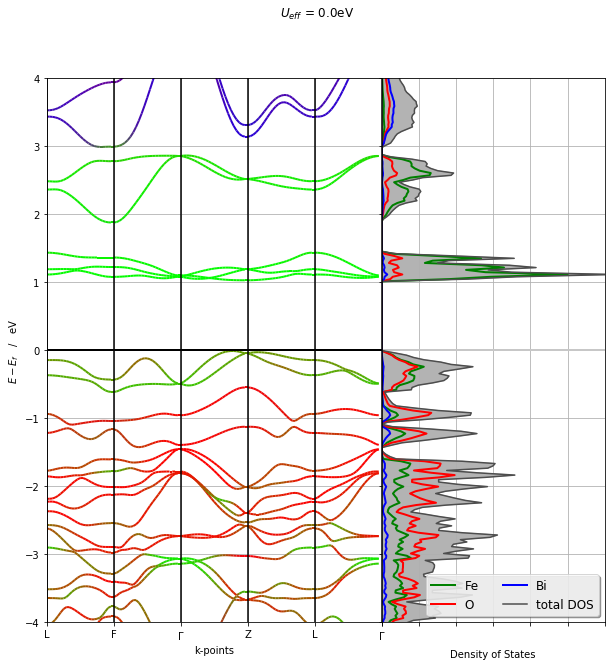

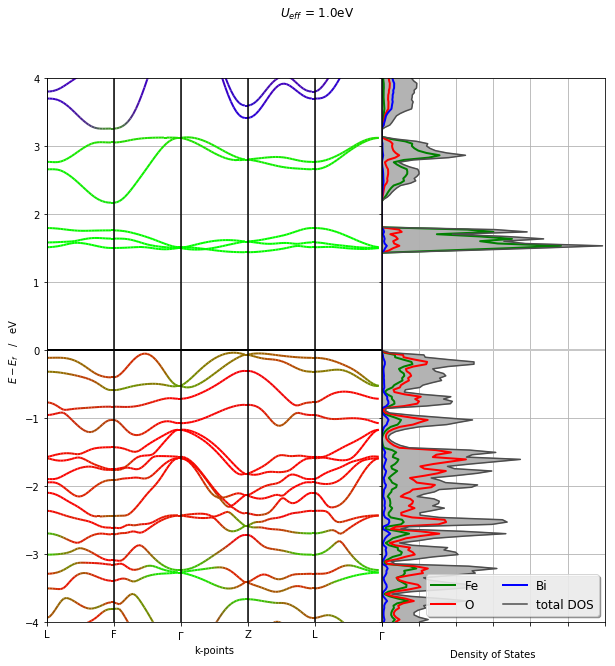

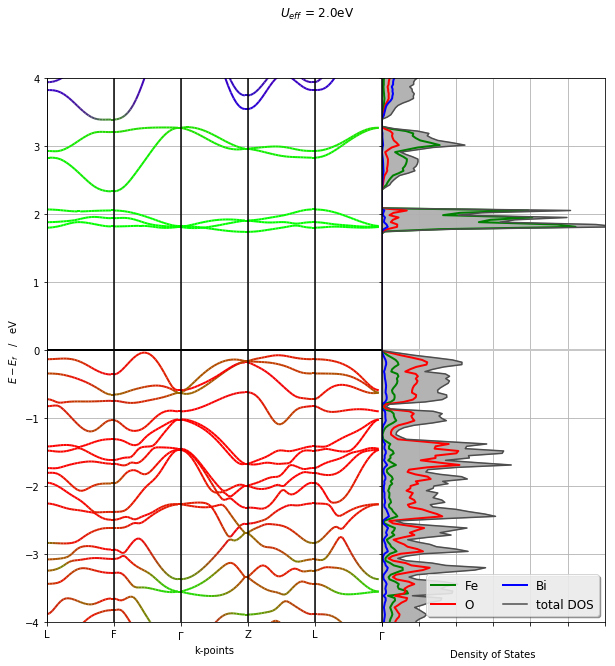

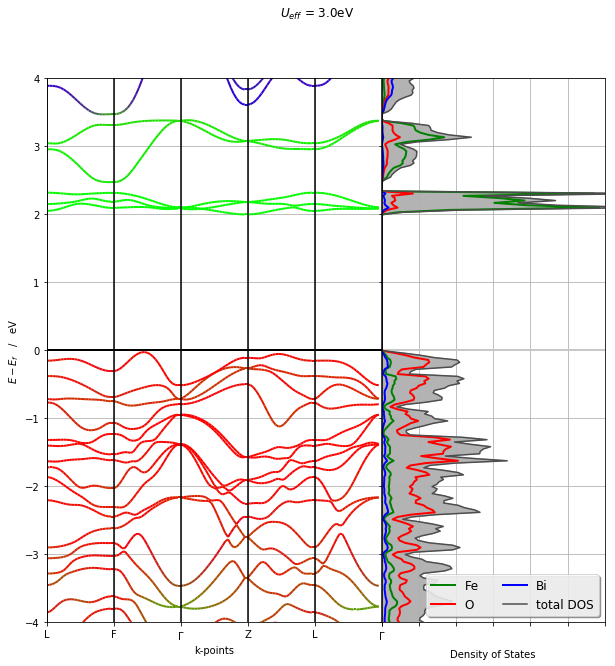

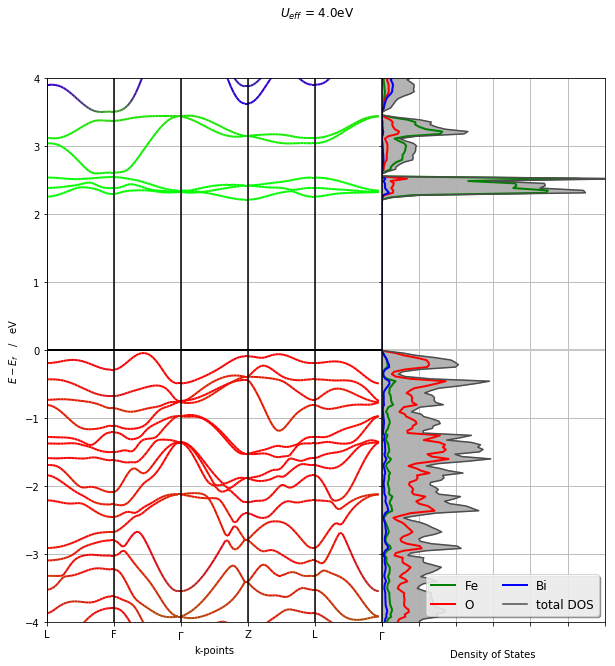

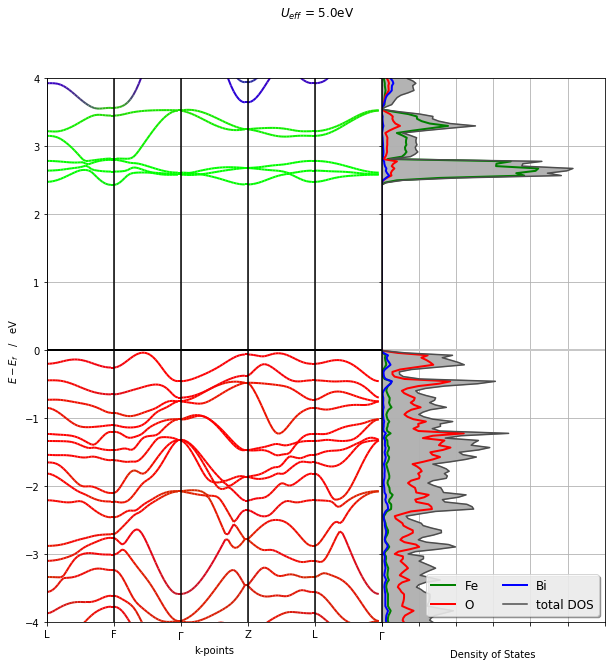

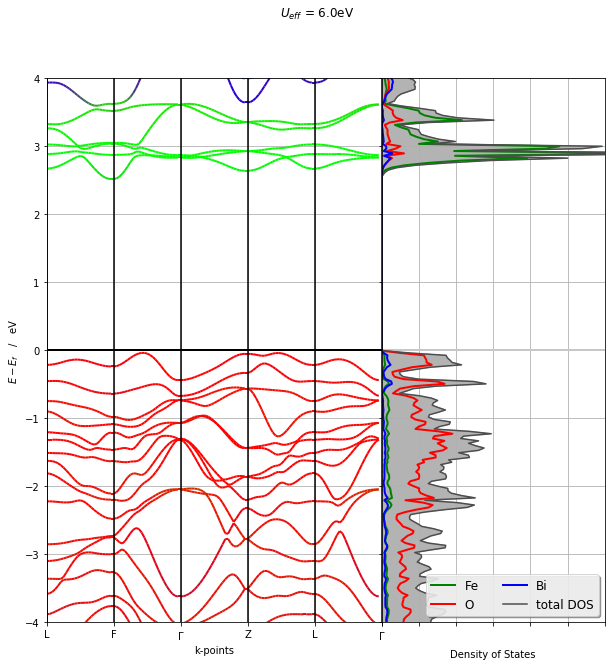

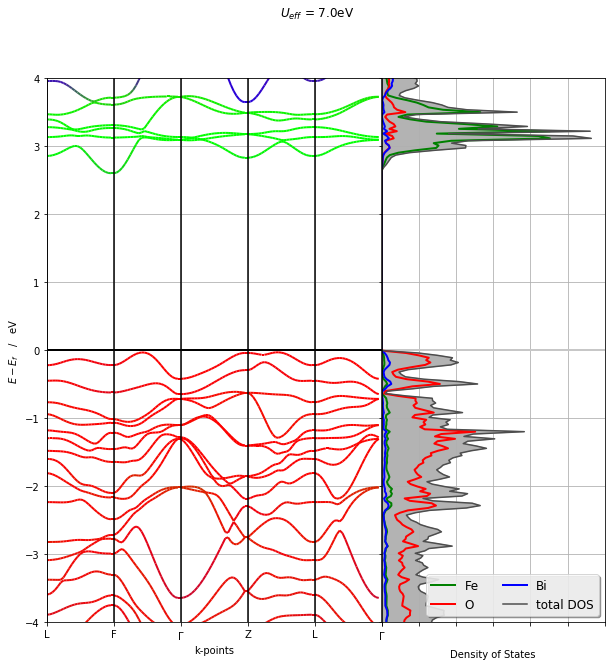

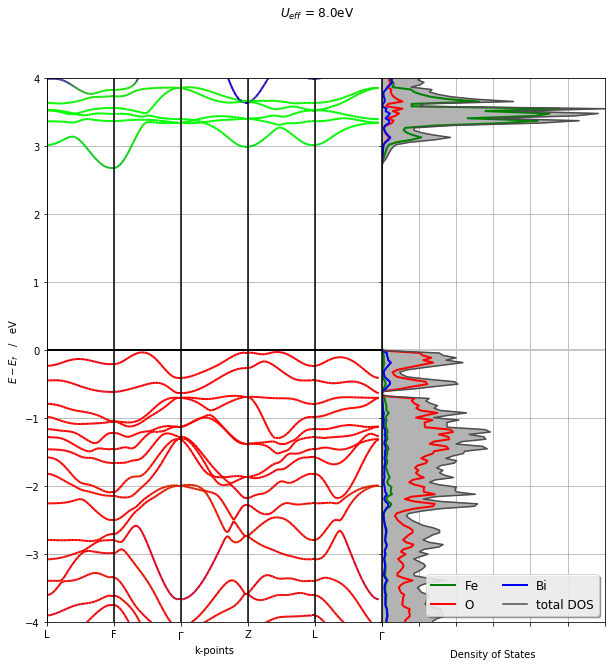

In [113]:
for u in range(9):
    plotbanddos(u)

The figures are now saved in the images folder; let's display thumbnails of them here:

In [206]:
imagesList=''.join( ["<img style='width: 220px; margin: 5px; float: left; border: 1px solid black;' src='%s' />" % str(s) 
                     for s in sorted(glob('images/rhomb_banddos_U??.png')) ])

display(HTML(imagesList))

#### Effective mass tensors

The effective mass tensors are computed using the code and method of Alexandr Fonari and Christopher Sutton: [EMC](https://github.com/afonari/emc/)

The output of the EMC code is an 'effective mass tensor', and the principle effective masses and directions.

The principle effective masses are the inverse of the eigenvalues of the effective mass tensor in the output.
Equivalently, they are the eigenvalues of the inverse of the reported effective mass tensor.
i.e. the reported tensor is in fact the inverse of the effective mass tensor.

Let's write a class to read the m\* tensors from the emc code output:

In [146]:
class Emcout:
    def __init__(self, filename='emcpy.out'):
        re_tensor = re.compile("Effective mass tensor")
        re_princ  = re.compile("Principle effective masses and directions")
        with open(filename) as f:
            for line in f:
                if re_tensor.search(line):
                    blank=f.next()
                    tens1=f.next()
                    tens2=f.next()
                    tens3=f.next()
                if re_princ.search(line):
                    blank=f.next()
                    m0=float(f.next().split()[-1])
                    blank=f.next()
                    blank=f.next()
                    blank=f.next()
                    m1=float(f.next().split()[-1])
                    blank=f.next()
                    blank=f.next()
                    blank=f.next()
                    m2=float(f.next().split()[-1])

        tensor = np.array([[float(tens1.split()[0]) ,float(tens1.split()[1]), float(tens1.split()[2])],
                           [ float(tens2.split()[0]) ,float(tens2.split()[1]), float(tens2.split()[2])],
                           [ float(tens3.split()[0]) ,float(tens3.split()[1]), float(tens3.split()[2])]])
        principlemasses = np.array([m0, m1, m2])
        # Numpy array containing the full effective mass tensor
        self.tensor  = tensor
        # Principle effective masses
        self.principlemasses = principlemasses

Let's gather the m\* tensors. 

Note that we obtain the inverse of the reported tensor.

In [161]:
# VBM curvature tensors
vbcurvtensors = [Emcout("rhombohedral_setting/relaxed_geometry/U_{}/vb/emcpy.out_1467100988".format(u)).tensor
                 for u in range(9)]
# VBM m* tensors (taking the inverse)
vbtensors = [np.linalg.inv(tensor) for tensor in vbcurvtensors]


# CBM curvature tensors
cbcurvtensors = [Emcout("rhombohedral_setting/relaxed_geometry/U_{}/cb/emcpy.out_1467100988".format(u)).tensor
                 for u in range(9)]
# CBM m* tensors (taking the inverse)
cbtensors = [np.linalg.inv(tensor) for tensor in cbcurvtensors]

Now let's obtain the principle effective masses.

We can obtain them directly from the output files:

``` python
vb_masses = [Emcout("rhombohedral_setting/relaxed_geometry/U_{}/vb/emcpy.out_1467100988".format(u)).principlemasses
                 for u in range(9)]
cb_masses = [Emcout("rhombohedral_setting/relaxed_geometry/U_{}/cb/emcpy.out_1467100988".format(u)).principlemasses
                 for u in range(9)]
```
or calculate them from the tensors.
For completeness let's just compute them:

In [ ]:
vb_masses = np.array([np.linalg.eigvals(vbtensors[u]) for u in range(9)])
cb_masses = np.array([np.linalg.eigvals(cbtensors[u]) for u in range(9)])

For the purposes of comparison we take the smallest (absolute) eigenvalue of the m\* tensor for each value of U.

In [198]:
compareholemass = []
compareelecmass = []

print "VB (hole) principle masses"
for u in range(9):
    smallest = np.sort(abs(vb_masses[u]))[0]
    compareholemass.append(smallest)
    print "U = {0} eV    {1:2.2f} m_0  ".format(u, smallest)
print "\nCB (electron) principle masses"
for u in range(9):        
    smallest = np.sort(abs(cb_masses[u]))[0]
    compareelecmass.append(smallest)
    print "U = {0} eV    {1:2.2f} m_0  ".format(u, smallest)

VB (hole) principle masses
U = 0 eV    1.90 m_0  
U = 1 eV    1.98 m_0  
U = 2 eV    0.69 m_0  
U = 3 eV    0.70 m_0  
U = 4 eV    0.73 m_0  
U = 5 eV    0.77 m_0  
U = 6 eV    0.88 m_0  
U = 7 eV    0.91 m_0  
U = 8 eV    0.89 m_0  

CB (electron) principle masses
U = 0 eV    8.33 m_0  
U = 1 eV    7.79 m_0  
U = 2 eV    6.02 m_0  
U = 3 eV    4.51 m_0  
U = 4 eV    3.04 m_0  
U = 5 eV    0.58 m_0  
U = 6 eV    0.51 m_0  
U = 7 eV    0.50 m_0  
U = 8 eV    0.47 m_0  


### Fixed Geometry

Here the geometry was fixed to the U=4 eV relaxed structure. Here's a summary of the structure:

In [44]:
fixedstruct = relaxations[4].final_structure
print fixedstruct

Full Formula (Fe2 Bi2 O6)
Reduced Formula: FeBiO3
abc   :   5.705956   5.705956   5.705956
angles:  59.061362  59.061362  59.061362
Sites (10)
  #  SP            a          b          c
---  ----  ---------  ---------  ---------
  0  Bi     0.279268   0.279268   0.279268
  1  Bi     0.779275   0.77928    0.779276
  2  O      0.669335   0.215676   0.813097
  3  O      0.215677   0.813095   0.669336
  4  O      0.813097   0.669335   0.215678
  5  O      0.313119   0.715661   0.169327
  6  O      0.169327   0.313117   0.715662
  7  O      0.715663   0.169327   0.313118
  8  Fe     0.5        0.499999   0.499998
  9  Fe    -3e-06     -3e-06     -3e-06


#### Projected bands and DOS

Now let's read in all the data (this step may take a few seconds):

In [201]:
fixeddosruns = [Vasprun("rhombohedral_setting/fixed_geometry/U_{0}/dos_vasprun.xml".format(u))
                for u in range(9)]

/Users/kshenton/Library/Python/2.7/lib/python/site-packages/pymatgen/io/vasp/outputs.py:814: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/kshenton/OneDrive - University College London/PhD/Data/BFO/BFO_dftu_SI/rhombohedral_setting/fixed_geometry/U_0
  " was found in {}".format(os.path.abspath(p)))
/Users/kshenton/Library/Python/2.7/lib/python/site-packages/pymatgen/io/vasp/outputs.py:814: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/kshenton/OneDrive - University College London/PhD/Data/BFO/BFO_dftu_SI/rhombohedral_setting/fixed_geometry/U_1
  " was found in {}".format(os.path.abspath(p)))
/Users/kshenton/Library/Python/2.7/lib/python/site-packages/pymatgen/io/vasp/outputs.py:814: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/kshenton/OneDrive - University College London/PhD/Data/BFO/BFO_dftu_SI/rhombohedral_setting/fixed_geometry/U_2
  " was found in {}".format(os.path.abspath(p)))
/Users/kshenton/

In [202]:
fixedbandruns = [Vasprun("rhombohedral_setting/fixed_geometry/U_{0}/bands_vasprun.xml".format(u),
                 parse_projected_eigen=True) for u in range(9)]

We need to modify the function we wrote above to plot the bands and DOS:

In [204]:
def plotbanddos_fixed(ueff):
    dosrun = fixeddosruns[ueff]
    
    chemsymbols = dosrun.atomic_symbols

    Biindicies = [i for i, atom in enumerate(chemsymbols) if atom == "Bi"]
    Feindicies = [i for i, atom in enumerate(chemsymbols) if atom == "Fe"]
    Oindicies  = [i for i, atom in enumerate(chemsymbols) if atom == "O"]
    
    pdos = dosrun.complete_dos.get_element_dos()
    print 'Getting element projected DOS'

    # Get element projected DOS
    bidos = pdos[elementBi]
    fedos = pdos[elementFe]
    odos  = pdos[elementO]

    print 'Importing bands run'
    bands   = fixedbandruns[ueff].get_band_structure(kpath, line_mode = True, efermi=dosrun.efermi)

    pbands = bands.get_projection_on_elements()

    # set up matplotlib plot
    # ----------------------
    # set up 2 graph with aspec ration 2/1
    # plot 1: bands diagram
    # plot 2: Density of States
    gs = GridSpec(1, 2, width_ratios=[1.5, 1])
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(r"$U_{eff}$"+" = {0:2.1f}eV".format(ueff))
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])  # , sharey=ax1)

    # set ylim for the plot
    emin = -4
    emax =  4
    ax1.set_ylim(emin, emax)
    ax2.set_ylim(emin, emax)

    # Band Diagram
    # ------------
    name = "Fe"
    
    # compute s, p, d normalized contributions
    contrib = np.zeros((bands.nb_bands, len(bands.kpoints), 3))
    # for spin in [Spin.down, Spin.up]:
    for spin in [Spin.down]:
        for b in range(bands.nb_bands):
            for k in range(len(bands.kpoints)):
                bicontr = pbands[spin][b][k]["Bi"]**2
                fecontr = pbands[spin][b][k]["Fe"]**2
                ocontr  = pbands[spin][b][k]["O"]**2
                tot = bicontr + fecontr + ocontr
                if tot != 0.0:
                    # Red
                    contrib[b, k, 0] += ocontr / tot
                    # Green
                    contrib[b, k, 1] += fecontr / tot
                    # Blue
                    # contrib[b, k, 2] = pc / tot
                    contrib[b, k, 2] += bicontr / tot

    # plot bands using rgb mapping
    for b in range(bands.nb_bands):
        rgbline(ax1,
                range(len(bands.kpoints)),
                [e - bands.efermi for e in bands.bands[Spin.up][b]],
                contrib[b, :, 0],
                contrib[b, :, 1],
                contrib[b, :, 2])

    # style
    ax1.set_xlabel("k-points")
    ax1.set_ylabel(r"$E - E_f$   /   eV")
    ax1.grid()

    # fermi level at 0
    ax1.hlines(y=0, xmin=0, xmax=len(bands.kpoints), color="k", lw=2)

    # labels
    nlabs = len(labels)
    step = len(bands.kpoints) / (nlabs - 1)
    for i, lab in enumerate(labels):
        ax1.vlines(i * step, emin, emax, "k")
    ax1.set_xticks([i * step for i in range(nlabs)])
    ax1.set_xticklabels(labels)

    ax1.set_xlim(0, len(bands.kpoints))
    #ax1.set_title("Bands diagram")

    # Density of states
    # -----------------

    ax2.set_yticklabels([])
    ax2.grid()
    ax2.set_xlim(1e-6, 30)
    ax2.set_xticklabels([])
    ax2.hlines(y=0, xmin=0, xmax=30, color=tableau20[15], lw=2)
    ax2.set_xlabel("Density of States", labelpad=20)
    #ax2.set_title("Density of States")

    # spd contribution
    # --- Fe ---#
    ax2.plot(fedos.densities[Spin.up]+fedos.densities[Spin.down],
             dosrun.tdos.energies - dosrun.efermi,
             "g-", label=r"Fe", lw=2)

    # --- O ---#
    ax2.plot(odos.densities[Spin.up]+odos.densities[Spin.down],
             dosrun.tdos.energies - dosrun.efermi,
             "r-", label=r"O ", lw=2)
    # --- Bi ---#

    ax2.plot(bidos.densities[Spin.up]+bidos.densities[Spin.down],
             dosrun.tdos.energies - dosrun.efermi,
             "b-", label=r"Bi", lw=2)

    # total dos
    ax2.fill_between(dosrun.tdos.densities[Spin.up]+dosrun.tdos.densities[Spin.down],
                     0,
                     dosrun.tdos.energies - dosrun.efermi,
                     color=(0.7, 0.7, 0.7),
                     facecolor=(0.7, 0.7, 0.7))

    ax2.plot(dosrun.tdos.densities[Spin.up]+dosrun.tdos.densities[Spin.down],
             dosrun.tdos.energies - dosrun.efermi,
             color=(0.3, 0.3, 0.3),
             label="total DOS")

    # plot format style
    # -----------------
    ax2.legend(fancybox=True, shadow=True, prop={'size': 12}, ncol=2, loc=4) # 1-> upper right;4 => lower right
    plt.subplots_adjust(wspace=0)

    # plt.show()
    plt.savefig("images/rhomb_banddos_U{0:02d}_fixed.png".format(int(round(ueff))),format='png')
#     plt.show()

Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run
Getting element projected DOS
Importing bands run


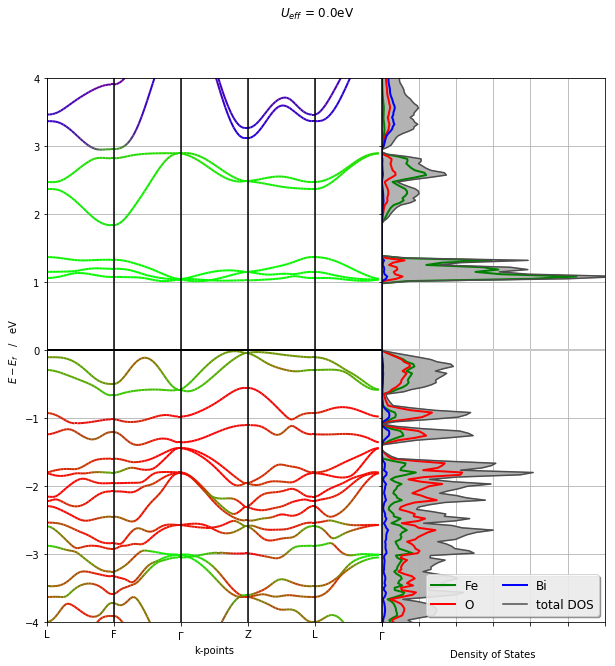

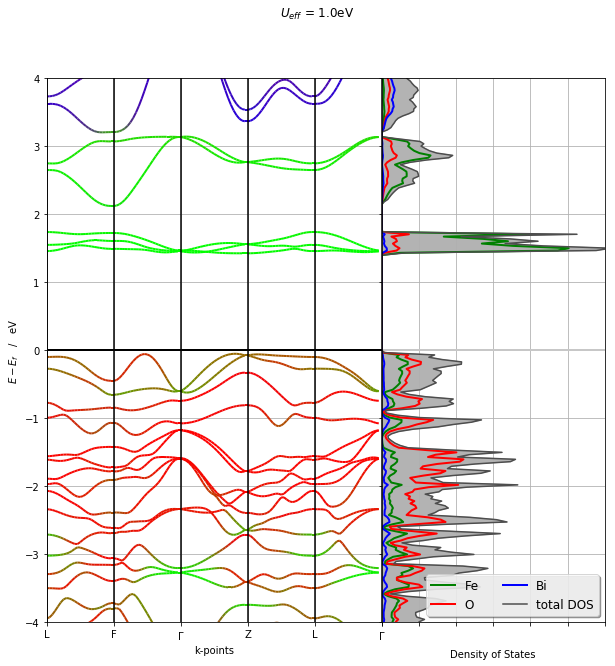

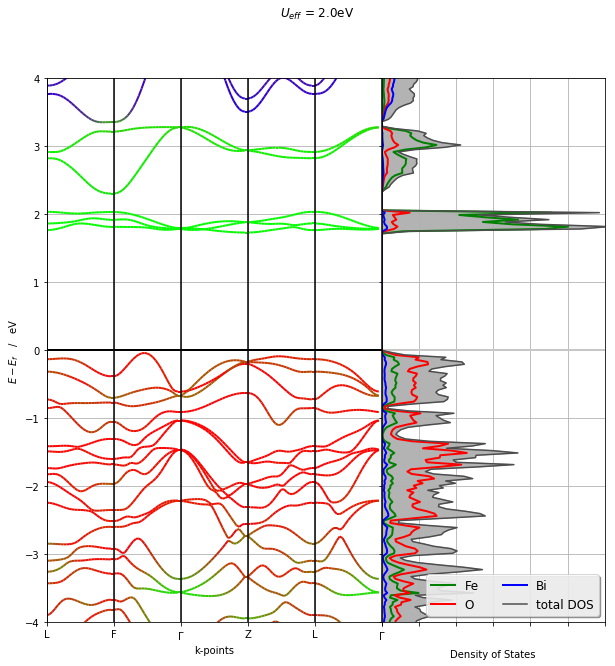

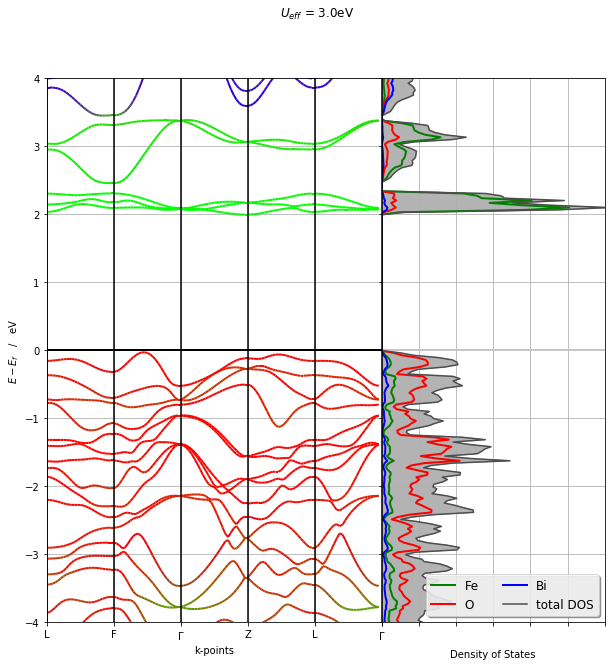

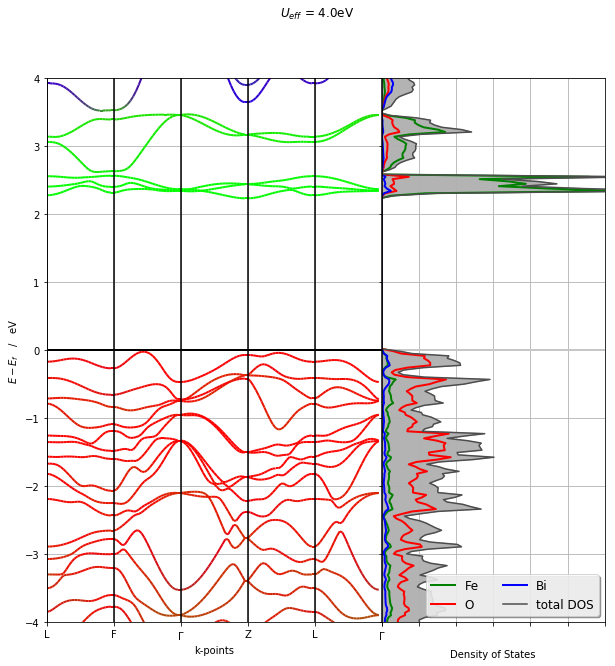

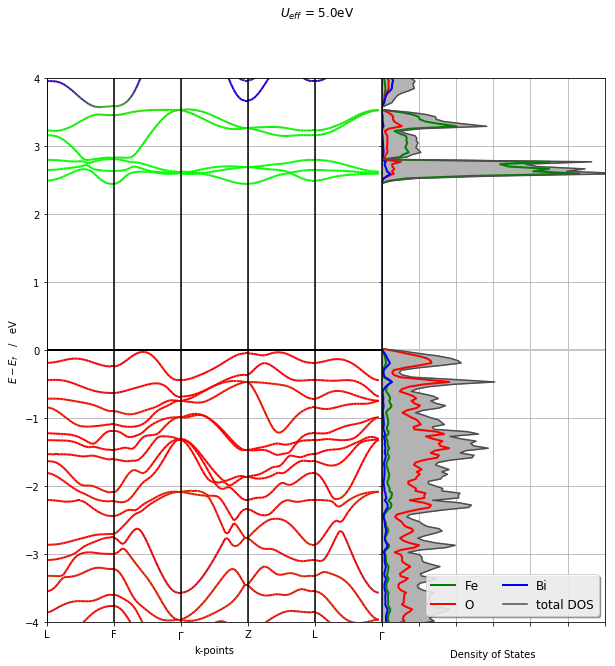

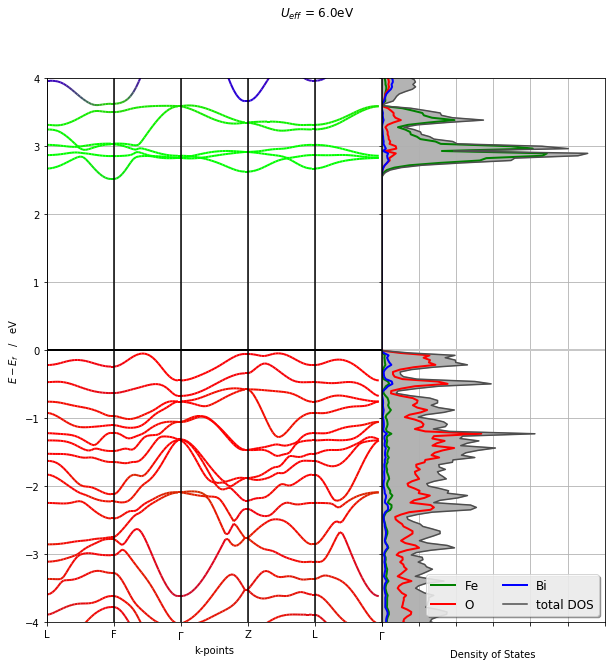

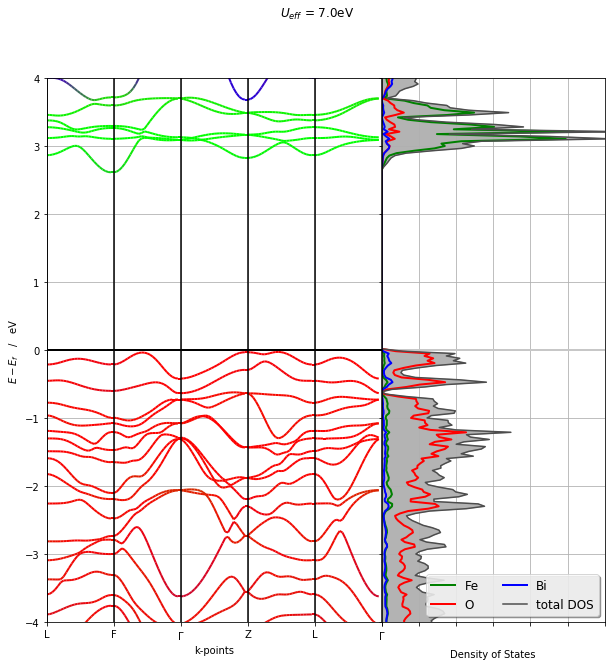

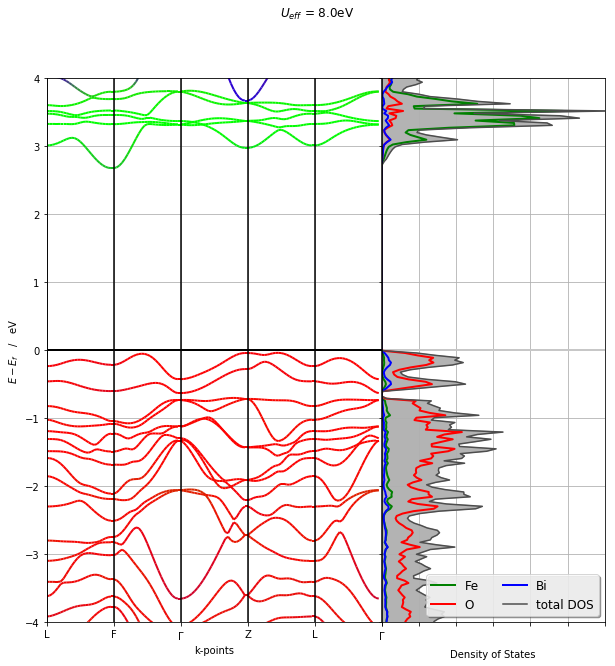

In [205]:
for u in range(9):
    plotbanddos_fixed(u)

In [207]:
imagesList=''.join( ["<img style='width: 220px; margin: 5px; float: left; border: 1px solid black;' src='%s' />" % str(s) 
                     for s in sorted(glob('images/rhomb_banddos_U??_fixed.png')) ])

display(HTML(imagesList))

#### Effective mass tensors

Let's gather the m\* tensors. 

Note that we obtain the inverse of the reported tensor.

In [208]:
# VBM curvature tensors
fixedvbcurvtensors = [Emcout("rhombohedral_setting/fixed_geometry/U{0}_emcpy.out_vb".format(u)).tensor
                 for u in range(9)]
# VBM m* tensors (taking the inverse)
fixedvbtensors = [np.linalg.inv(tensor) for tensor in fixedvbcurvtensors]


# CBM curvature tensors
fixedcbcurvtensors = [Emcout("rhombohedral_setting/fixed_geometry/U{}_emcpy.out_cb".format(u)).tensor
                 for u in range(9)]
# CBM m* tensors (taking the inverse)
fixedcbtensors = [np.linalg.inv(tensor) for tensor in fixedcbcurvtensors]

In [210]:
fxd_vb_masses = np.array([np.linalg.eigvals(fixedvbtensors[u]) for u in range(9)])
fxd_cb_masses = np.array([np.linalg.eigvals(fixedcbtensors[u]) for u in range(9)])

In [211]:
fxd_compareholemass = []
fxd_compareelecmass = []

print "VB (hole) principle masses"
for u in range(9):
    smallest = np.sort(abs(fxd_vb_masses[u]))[0]
    fxd_compareholemass.append(smallest)
    print "U = {0} eV    {1:2.2f} m_0  ".format(u, smallest)
print "\nCB (electron) principle masses"
for u in range(9):        
    smallest = np.sort(abs(fxd_cb_masses[u]))[0]
    fxd_compareelecmass.append(smallest)
    print "U = {0} eV    {1:2.2f} m_0  ".format(u, smallest)

VB (hole) principle masses
U = 0 eV    1.34 m_0  
U = 1 eV    1.57 m_0  
U = 2 eV    0.66 m_0  
U = 3 eV    0.70 m_0  
U = 4 eV    0.75 m_0  
U = 5 eV    0.79 m_0  
U = 6 eV    0.96 m_0  
U = 7 eV    0.95 m_0  
U = 8 eV    0.93 m_0  

CB (electron) principle masses
U = 0 eV    4.14 m_0  
U = 1 eV    6.59 m_0  
U = 2 eV    5.37 m_0  
U = 3 eV    4.32 m_0  
U = 4 eV    3.01 m_0  
U = 5 eV    0.56 m_0  
U = 6 eV    0.51 m_0  
U = 7 eV    0.50 m_0  
U = 8 eV    0.48 m_0  
